<a href="https://colab.research.google.com/github/sowmyarajesh/ML_ANN/blob/main/ANN_TitanicClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [404]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics

In [27]:
print(tf.__version__)

2.8.0


### Load the data

In [28]:
# import dataset from the local . download the data from titanic folder in this repo or from https://www.kaggle.com/competitions/titanic/data
from google.colab import files
upload  = files.upload()

Saving gender_submission.csv to gender_submission (3).csv
Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [278]:
!ls

gender_submission.csv  predictions.csv	sample_data  test.csv  train.csv


In [405]:
train = pd.read_csv('train.csv')
x_test = pd.read_csv('test.csv')
y_test = pd.read_csv('gender_submission.csv')

In [406]:
print(y_test.columns, x_test.columns)

# merge all both tables for test
test = pd.merge(x_test,y_test,how='inner',on='PassengerId')
test.shape, test.columns

# size of the training and testing data set
train.shape, x_test.shape, y_test.shape



Index(['PassengerId', 'Survived'], dtype='object') Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


((891, 12), (418, 11), (418, 2))

### EDA

========Survived==========



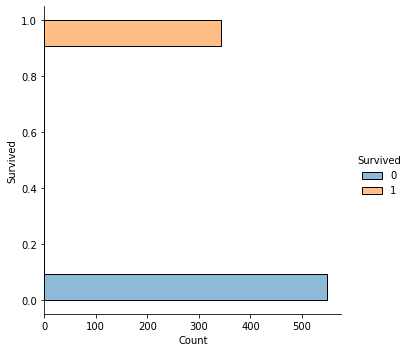

========Pclass==========



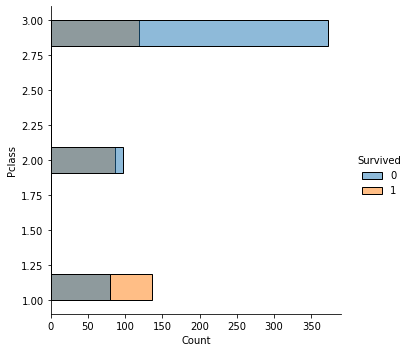

========Sex==========



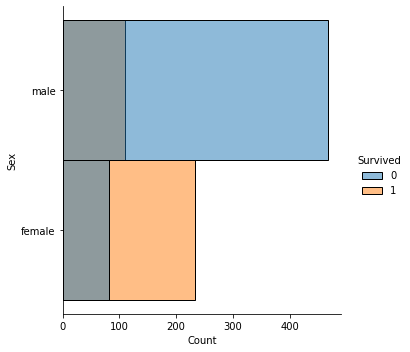

========Age==========



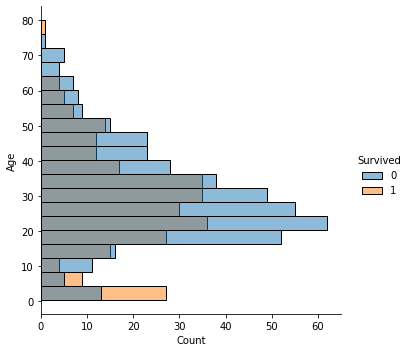

========SibSp==========



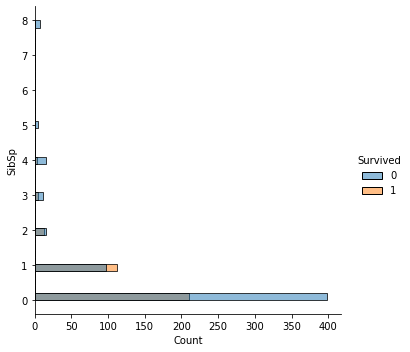

========Parch==========



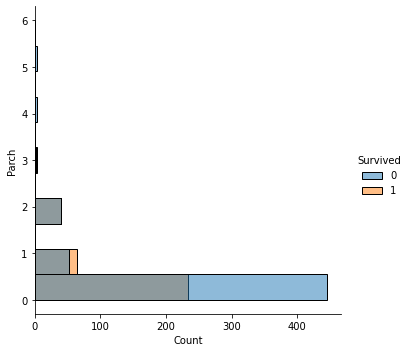

========Ticket==========



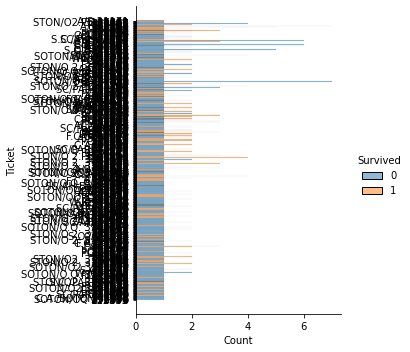

========Fare==========



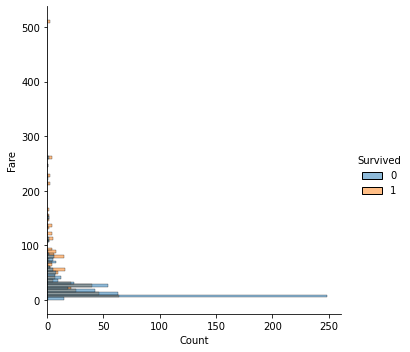

========Cabin==========



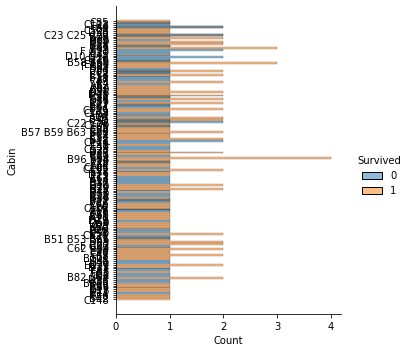

========Embarked==========



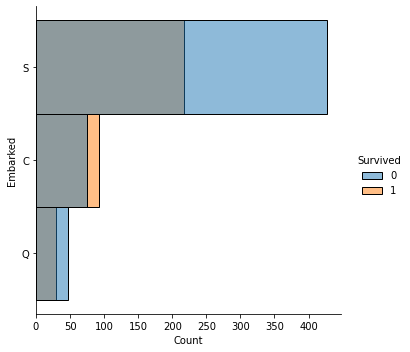

In [377]:
# get Distribution of values
skipCol = ['PassengerId', 'Name',]
import seaborn as sns
for col in train.columns:
  if col not in skipCol:
    print("========{}==========\n".format(col))
    sns.displot(y=col, data=train, hue='Survived')
    plt.show()

In [ ]:
# Missing values
train.isna().sum(), test.isna().sum()

columns in the data data set are ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
here we will not need the following columns in the model:

- PassengerId - it is an unique identifier to each record. 
- Name - refer to the name of the induvidual. No significance to output
- Ticket - refers to the ticket ID for reference.
- Fare - refers to the total fair. 
- cabin - lots oif missing values. Frequency table doesnot provide enough information for imputation.

**Handle missing value**

Age: dropping the column may have some effect on the output. The missing rows can be imputed with mean age

Embarked - drop the missing rows since it is only 2



In [407]:
# handle missing value
train['Age'] = train['Age'].fillna(np.mean(train['Age']))
test['Age'] = test['Age'].fillna(np.mean(test['Age']))

In [256]:
# train = train[~train['Embarked'].isna()]
# test = test[~test['Embarked'].isna()]

**Check the correlation of the input to the target**

In [408]:
train.corr()['Survived'].abs()

PassengerId    0.005007
Survived       1.000000
Pclass         0.338481
Age            0.069809
SibSp          0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

**Input and target Features**

In [409]:
input_features = [ 'Pclass',  'Sex']
target_Feature = 'Survived'
x_train = pd.DataFrame(train[input_features], columns=input_features)
y_train = train[target_Feature]
x_test = pd.DataFrame(test[input_features], columns=input_features)
y_test = test[target_Feature]

In [410]:
# one hot encoding of the categorical features
x_train= pd.get_dummies(x_train, drop_first=True)
x_test= pd.get_dummies(x_test, drop_first=True)

In [411]:
x_train.columns, x_test.columns

(Index(['Pclass', 'Sex_male'], dtype='object'),
 Index(['Pclass', 'Sex_male'], dtype='object'))

In [412]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((891, 2), (418, 2), (891,), (418,))

# Models

### Neural Network

To build the model,first initialize the model


In [413]:
# initialize the sequence
model = tf.keras.models.Sequential()

n=x_train.shape[1]
inputLayer = tf.keras.layers.Dense(units=n, activation='relu', input_dim=n)
outputLayer = tf.keras.layers.Dense(units=1, activation="sigmoid")
model.add(inputLayer)
model.add(outputLayer)
# compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
# train
x = x_train.to_numpy()
y = y_train.to_numpy()
model.fit(x, y, epochs=100, verbose=1)

#evaluate
test_loss, test_accuracy = model.evaluate(x_test,y_test)

y_pred =np.round(model.predict(x_test))
metrics.confusion_matrix(y_test,y_pred)
metrics.accuracy_score(y_test,y_pred)

Epoch 1/100
28/28 [==============================] - 0s 1ms/step - loss: 0.7639 - binary_accuracy: 0.5802
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7118 - binary_accuracy: 0.5802
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6864 - binary_accuracy: 0.5802
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6714 - binary_accuracy: 0.5802
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6602 - binary_accuracy: 0.5802
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6492 - binary_accuracy: 0.5802
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6387 - binary_accuracy: 0.5802
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6289 - binary_accuracy: 0.5802
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6198 - binary_accuracy: 0.6790
Epoch 10/100
28/28 [==========================

1.0

#### Logistic Regression

In [415]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
model.fit(x_train.to_numpy(),y_train.to_numpy())
y_pred = model.predict(x_test)
print(y_test.value_counts())
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(round(model.score(x_train, y_train) * 100, 2))

0    266
1    152
Name: Survived, dtype: int64
[[266   0]
 [  0 152]]
1.0
78.68


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### SVM

In [416]:
from sklearn.svm import SVC
svc_m = SVC(gamma="scale")
svc_pred = svc_m.fit(x_train, y_train).predict(x_test)
print("SVM Accuracy is ",metrics.accuracy_score(y_test,svc_pred))

SVM Accuracy is  1.0


### Save the results for submission to Kaggle

In [394]:
submission = pd.read_csv("gender_submission.csv")
submission['Survived'] = y_pred
submission.to_csv('predictions.csv')